# Atlantic Lobster Landings EDA
### Matthew Johnson

- Combined data from DFO Canada: http://www.dfo-mpo.gc.ca/stats/commercial/land-debarq-eng.htm
- Added Exchange Rates

Lobster weight - Metric tonnes<br>
Lobster value - Thousands of dollars

In [32]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
landings_cols = ['Species','NS_maritimes', 'NS_gulf', 'NS_total', 'NB_maritimes', 'NB_gulf', 'NB_total', 'PEI_total', 'QC_total', 
               'NFLD_total', 'Atlantic_total']
landings3_cols = ['Species','NS_maritimes_lic','NS_gulf_lic','NB_maritimes_lic','NB_gulf_lic','PEI_lic','QC_lic','NFLD_lic',
                  'Total_atlantic_lic']

landings = []
landing_vals = []
license_nums = []

preYear = '/Users/mattjohnson/Desktop/Python2018/Landings/AtlanticLandings/s'
postYear = 'aq_e.xls'
preYear2 = '/Users/mattjohnson/Desktop/Python2018/Landings/LandingFinancials/s'
postYear2 = 'av_e.xls'
preYear3 = '/Users/mattjohnson/Desktop/Python2018/Landings/licenceNumbers/se'
postYear3 = '_e.xls'
postYear3b = '_f.xls'

for i in range(1990,2017):
    path = preYear + str(i) + postYear
    path2 = preYear2 + str(i) + postYear2

    if i == 2012:
        path3 = preYear3 + '{0:02d}'.format(i % 100) + postYear3b
    else:
        path3 = preYear3 + '{0:02d}'.format(i % 100) + postYear3

    landing = pd.read_excel(path)
    landing2 = pd.read_excel(path2)
    landing3 = pd.read_excel(path3)
    
    landing.dropna(inplace=True)
    landing2.dropna(inplace=True)
    landing3.dropna(inplace=True)
    
    landing.columns = landings_cols
    landing2.columns = landings_cols
    landing3.columns = landings3_cols
    
    landing.columns = [str(col) + '_vol' for col in landing.columns]
    landing2.columns = [str(col) + '_val' for col in landing2.columns]
    
    landing['Species'] = landing['Species_vol']
    landing2['Species'] = landing2['Species_val']
    landing.drop('Species_vol', axis=1)
    landing2.drop('Species_val', axis=1)

    landing['Year'] = i
    landing2['Year'] = i
    landing3['Year'] = i
    
    landing['ind'] = landing.index
    landing2['ind'] = landing2.index
    landing3['ind'] = landing3.index

    landing.drop('ind', axis=1, inplace=True)
    landing2.drop('ind', axis=1, inplace=True)
    landing3.drop('ind', axis=1, inplace=True)

    landing.fillna(0.0, inplace=True)
    landing2.fillna(0.0, inplace=True)
    landing3.fillna(0.0, inplace=True)

    landing3['Species'] = landing3['Species'].str.capitalize()

    landing['merge_code'] = landing['Species'] + str(landing.iloc[0]['Year'])
    landing2['merge_code'] = landing2['Species'] + str(landing2.iloc[0]['Year'])
    landing3['merge_code'] = landing3['Species'] + str(landing3.iloc[0]['Year'])

    landings.append(landing.replace('x', 0))
    landing_vals.append(landing2.replace('x', 0))
    license_nums.append(landing3.replace('x', 0))

landingVolumes = pd.concat(landings)
landingValues = pd.concat(landing_vals)
numLicenses = pd.concat(license_nums)
#numLicenses['Species'] = numLicenses['Species'].str.capitalize()

df_list = [landingVolumes, landingValues, numLicenses]

In [2]:
print(landingVolumes.shape, landingValues.shape, numLicenses.shape)

(1216, 14) (1216, 14) (365, 11)


In [4]:
ex_rates = pd.read_csv('exchange_rates90.csv')

In [8]:
ex_rates['Date'] = pd.to_datetime(ex_rates['Date\xa0(GMT)'])

In [20]:
ex_rates
ex_rates['Rate_avg'] = ex_rates.groupby(ex_rates.Date.dt.year)['Rate**'].transform('mean')

In [53]:
avg_dict = {}
year = 1990
for i in range(0, 27*12, 12):
    num = np.round(ex_rates['Rate_avg'].iloc[i], 5)
    avg_dict.update({year : num})
    year+=1

In [363]:
#lobster_df2.to_csv('lobster_data.csv')

## Lobster

In [55]:
lobster_list = []

for df in df_list:
    lobster_rows = df[ (df['Species']=='Lobster') | (df['Species']=='LOBSTER')]
    lobster_list.append(lobster_rows.reset_index(drop=True))
    
lobster_df = pd.merge(lobster_list[0], lobster_list[1], on='merge_code', how='inner')
lobster_df2 = pd.merge(lobster_df, lobster_list[2], on='merge_code', how='inner')

lobster_df2['PEI_price_per_lb'] = (1000*lobster_df2['PEI_total_val'])/(lobster_df2['PEI_total_vol']*2204.62)
lobster_df2['NS_price_per_lb'] = (1000*lobster_df2['NS_total_val'])/(lobster_df2['NS_total_vol']*2204.62)
lobster_df2['NB_price_per_lb'] = (1000*lobster_df2['NB_total_val'])/(lobster_df2['NB_total_vol']*2204.62)
lobster_df2['NFLD_price_per_lb'] = (1000*lobster_df2['NFLD_total_val'])/(lobster_df2['NFLD_total_vol']*2204.62)
lobster_df2['QC_price_per_lb'] = (1000*lobster_df2['QC_total_val'])/(lobster_df2['QC_total_vol']*2204.62)

lobster_df2['NS_gulf_price_per_lb'] = (1000*lobster_df2['NS_gulf_val'])/(lobster_df2['NS_gulf_vol']*2204.62)
lobster_df2['NS_maritimes_price_per_lb'] = (1000*lobster_df2['NS_maritimes_val'])/(lobster_df2['NS_maritimes_vol']*2204.62)

lobster_df2['PEI_vol_per_lic'] = lobster_df2['PEI_total_vol']/lobster_df2['PEI_lic']
                                                                
lobster_df2['NS_gulf_vol_per_lic'] = lobster_df2['NS_gulf_vol']/lobster_df2['NS_gulf_lic']
lobster_df2['NS_mar_vol_per_lic'] = lobster_df2['NS_maritimes_vol']/lobster_df2['NS_maritimes_lic']
    
lobster_df2['NB_gulf_vol_per_lic'] = lobster_df2['NB_gulf_vol']/lobster_df2['NB_gulf_lic']
lobster_df2['NB_mar_vol_per_lic'] = lobster_df2['NB_maritimes_vol']/lobster_df2['NB_maritimes_lic']
                                                                     
lobster_df2['NFLD_vol_per_lic'] = lobster_df2['NFLD_total_vol']/lobster_df2['NFLD_lic']
lobster_df2['QC_vol_per_lic'] = lobster_df2['QC_total_vol']/lobster_df2['QC_lic']


lobster_df2.index = lobster_df2['Year']

In [56]:
lobster_df2['ex_rate'] = lobster_df2['Year'].map(avg_dict)

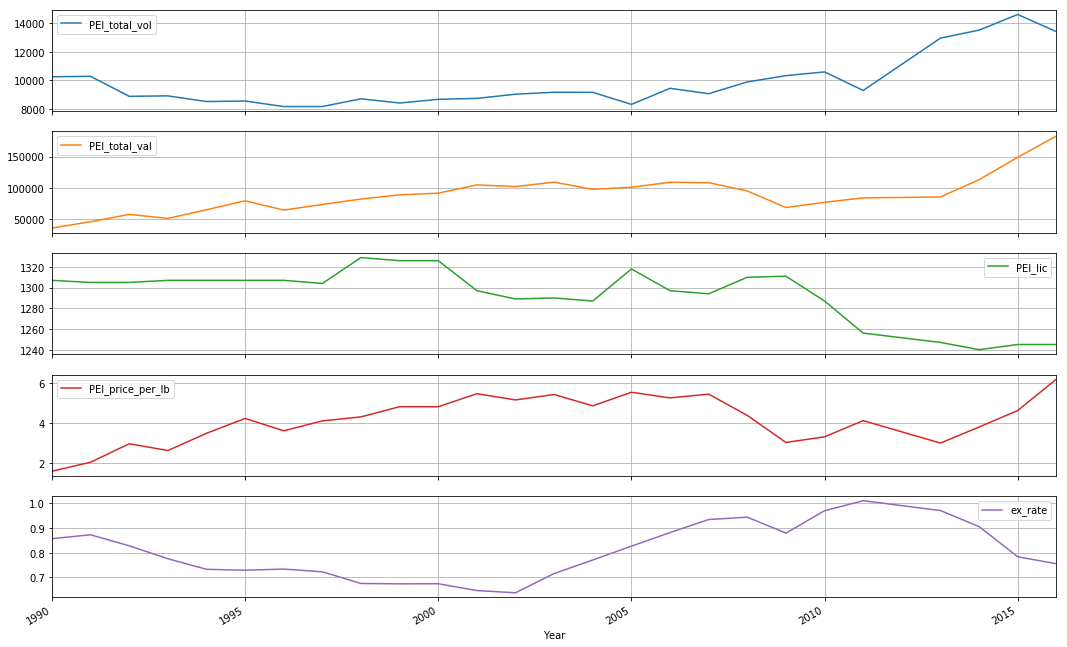

In [63]:
pei_df = lobster_df2[['PEI_total_vol', 'PEI_total_val', 'PEI_lic', 'PEI_price_per_lb', 'ex_rate']]
pei_df.plot(figsize=(18,12), subplots=True,  grid=True);

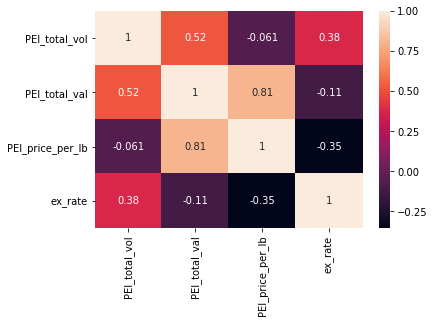

In [65]:
sns.heatmap(pei_df.corr(), annot=True)

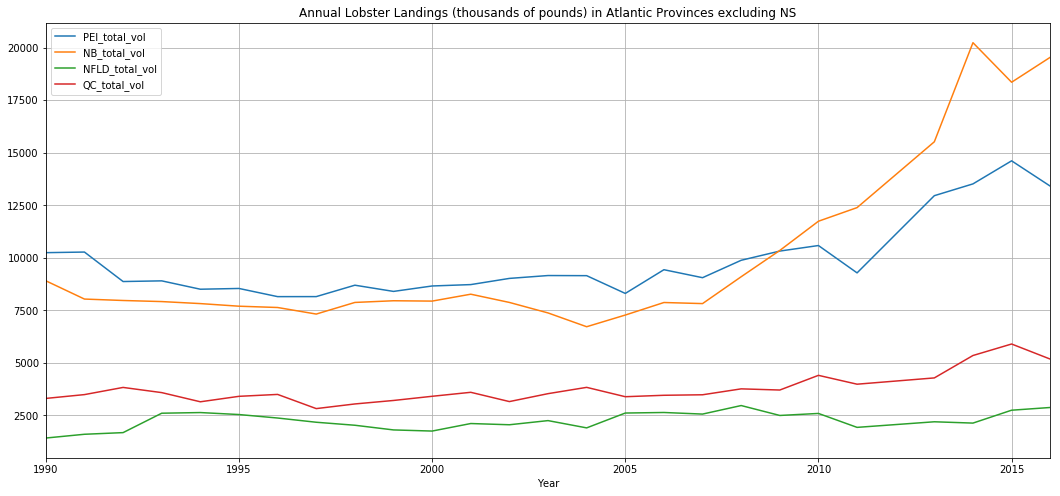

In [34]:
# 'NS_total_vol'
lobster_df2[['PEI_total_vol', 'NB_total_vol', 'NFLD_total_vol', 'QC_total_vol']].plot(
    figsize=(18,8), 
    title='Annual Lobster Landings (thousands of pounds) in Atlantic Provinces excluding NS', 
    grid=True);

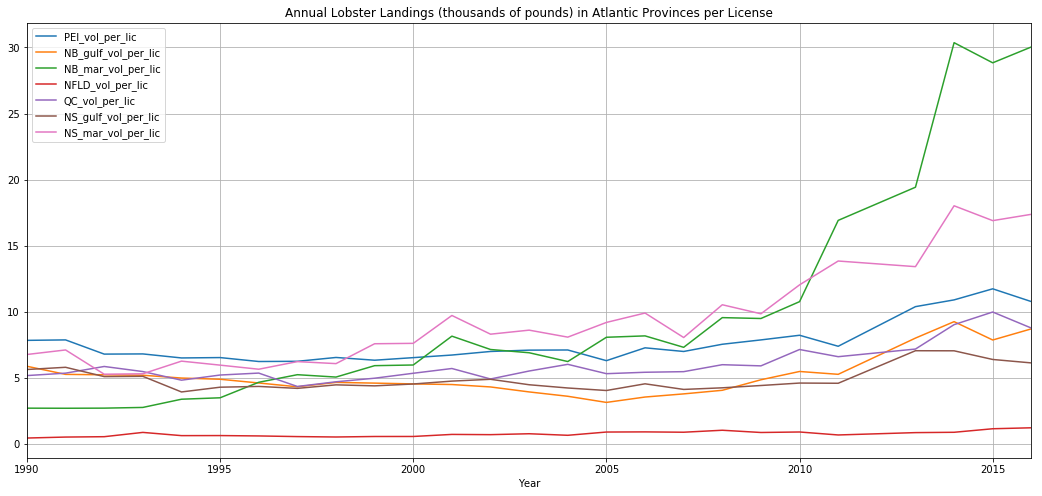

In [512]:
lobster_df2[['PEI_vol_per_lic', 'NB_gulf_vol_per_lic', 'NB_mar_vol_per_lic','NFLD_vol_per_lic', 'QC_vol_per_lic',
            'NS_gulf_vol_per_lic', 'NS_mar_vol_per_lic']].plot(
    figsize=(18,8), 
    title='Annual Lobster Landings (thousands of pounds) in Atlantic Provinces per License', 
    grid=True);

In [630]:
lobster_df2[['NFLD_lic', 'NFLD_total_vol', 'PEI_lic', 'PEI_total_vol']]

,NFLD_lic,NFLD_total_vol,PEI_lic,PEI_total_vol
Year,,,,
1990,3180,1427.092,1307,10246.196
1991,3076,1606.078,1305,10274.680
1992,3061,1684.668,1305,8872.678
1993,2982,2608.008,1307,8904.593
1994,4185,2639.066,1307,8506.702
1995,4006,2544.438,1307,8542.796
1996,3918,2379.032,1307,8154.109
1997,3901,2178.133,1304,8155.492
1998,3858,2035.195,1329,8698.141


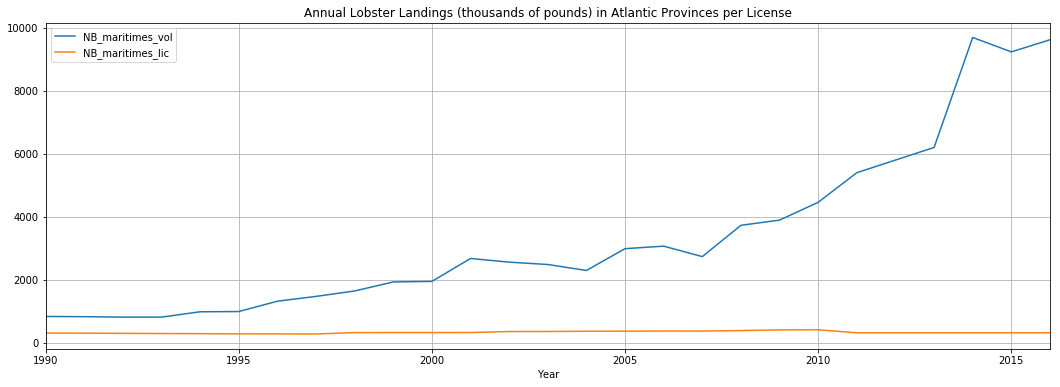

In [519]:
lobster_df2[['NB_maritimes_vol', 'NB_maritimes_lic']].plot(
    figsize=(18,6), 
    title='Annual Lobster Landings (thousands of pounds) in Atlantic Provinces per License', 
    grid=True);

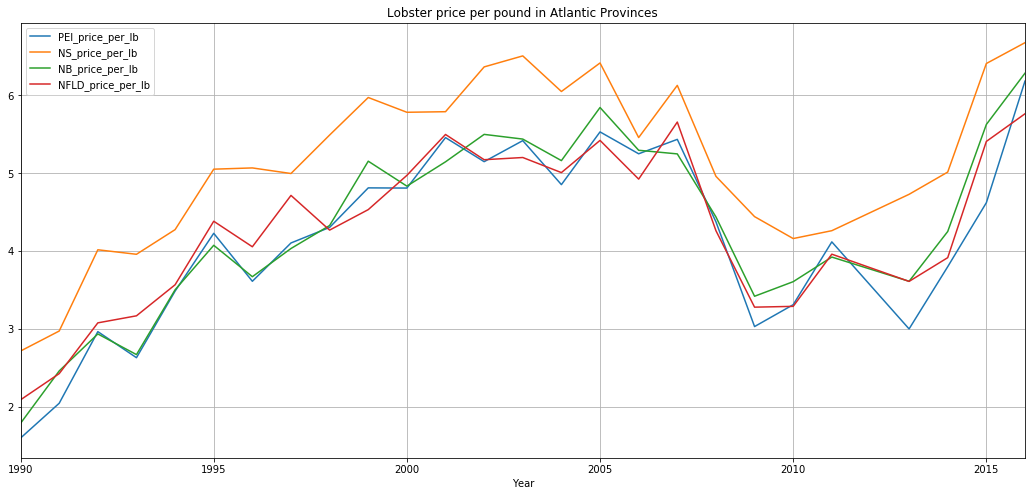

In [487]:
lobster_df2[['PEI_price_per_lb', 'NS_price_per_lb', 'NB_price_per_lb', 'NFLD_price_per_lb']].plot(figsize=(18,8), 
        title='Lobster price per pound in Atlantic Provinces', grid=True);

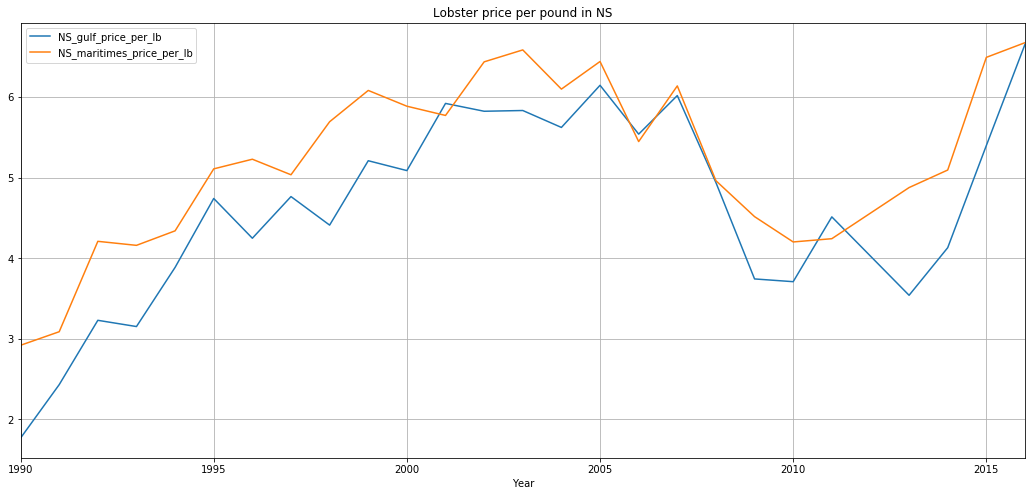

In [382]:
lobster_df2[['NS_gulf_price_per_lb', 'NS_maritimes_price_per_lb']].plot(figsize=(18,8), 
        title='Lobster price per pound in NS', grid=True);

In [331]:
lobster_piv = pd.pivot_table(lobster_df2, index= ['Year'], aggfunc= [min, max, np.mean])

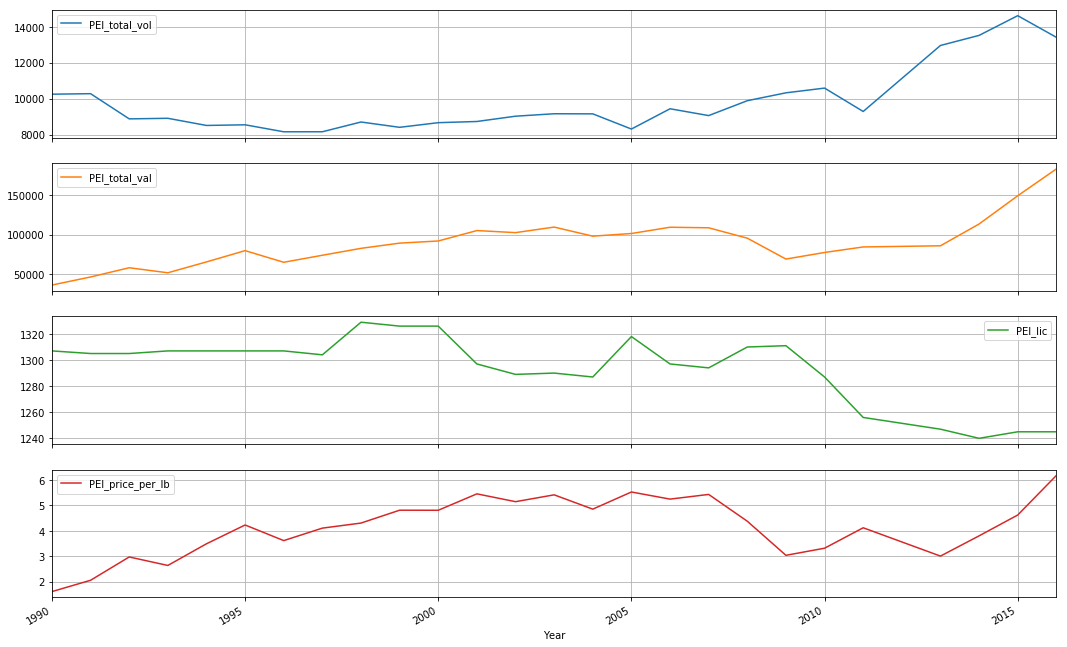

In [427]:
lobster_df2.index = lobster_df2['Year']
#lobster.drop(['Year'], axis=1,inplace=True)

lobster_df2[['PEI_total_vol', 'PEI_total_val', 'PEI_lic', 'PEI_price_per_lb']].plot(
           figsize=(18,12), subplots=True,  grid=True);

## All fish

In [388]:
#data = pd.merge(lobster_list[0], lobster_list[1], on='merge_code', how='inner')
#lobster_df2 = pd.merge(lobster_df, lobster_list[2], on='merge_code', how='inner')
#print(landingVolumes.shape, landingValues.shape, numLicenses.shape)

for d in df_list:
    d.index = d['Year']

data = pd.merge(df_list[0], df_list[1], on='merge_code', how='inner')
data = pd.merge(data, df_list[2], on='merge_code', how='inner')

In [468]:
data2 = data.T
data2.columns=data2.iloc[0]
data2.drop(['Species_vol', 'Species_x', 'Year_x', 'Species_y', 'Year_y', 'Species',
           'Species_val', 'merge_code'], inplace=True)

atlantic_totals = pd.concat([data2.loc['Atlantic_total_vol'], data2.T['Year']], axis=1)
atlantic_totals['Species'] = atlantic_totals.index.values
atlantic_totals = atlantic_totals[ atlantic_totals['Species'] != 'Total' ]
atlantic_totals.index = atlantic_totals['Year']
atlantic_totals.drop('Year', axis=1, inplace=True)

In [482]:
fish_types = ['Mackerel', 'Herring', 'Tuna', 'Squid', 'Lobster', 'Shrimp', 'Capelin', 'Swordfish', 'Salmon']
fish_list = []
for fish in fish_types:
    tempdf = atlantic_totals[ atlantic_totals['Species'] == fish ]
    tempdf.drop('Species', axis=1, inplace=True)
    tempdf.columns = [fish]
    fish_list.append(tempdf)

fish_df = pd.concat(fish_list, axis=1).fillna(0.0)

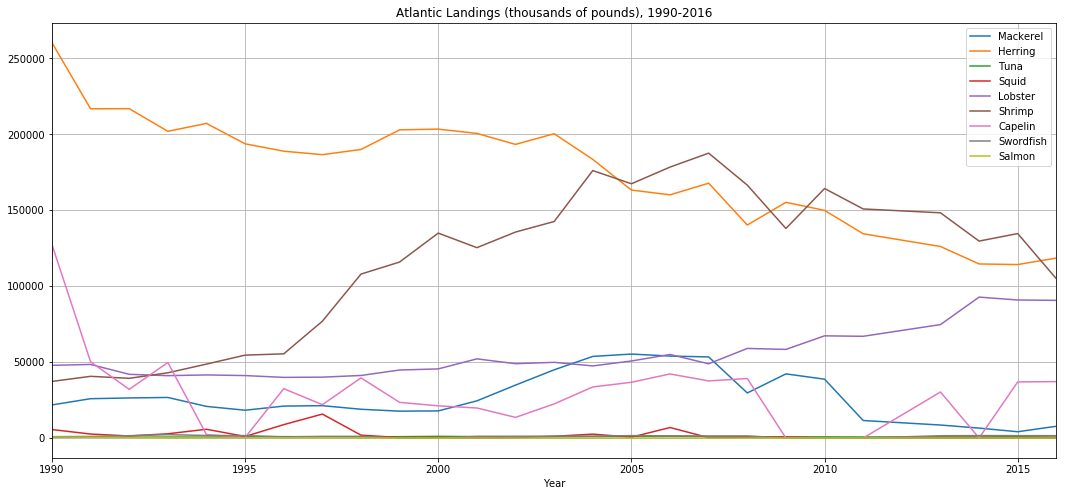

In [495]:
fish_df['Shrimp'][2003] =  142547
fish_df.plot(figsize=(18,8), grid=True, title='Atlantic Landings (thousands of pounds), 1990-2016');

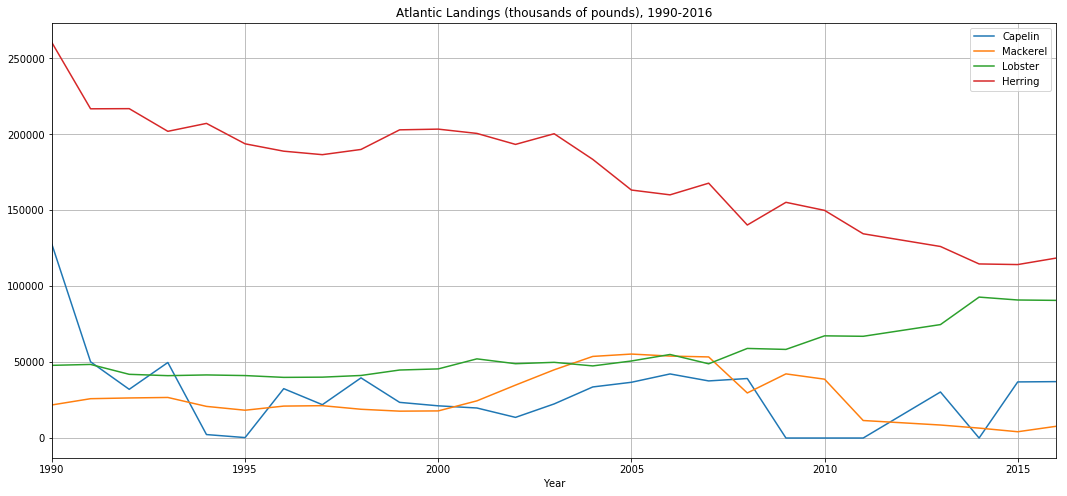

In [551]:
fish_df[['Capelin', 'Mackerel', 'Lobster', 'Herring']].plot(figsize=(18,8), grid=True, title='Atlantic Landings (thousands of pounds), 1990-2016');

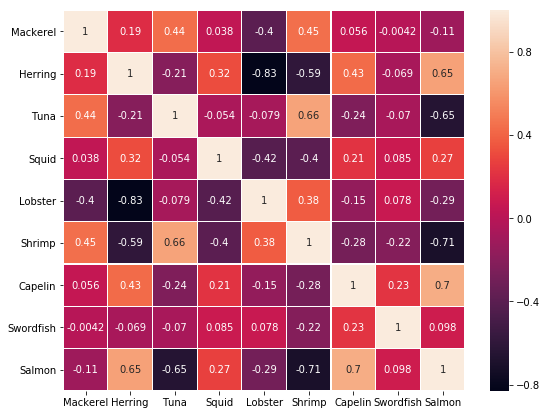

In [547]:
plt.figure(figsize=(9,7))
sns.heatmap(fish_df.corr(), annot=True , linewidths=.1, );

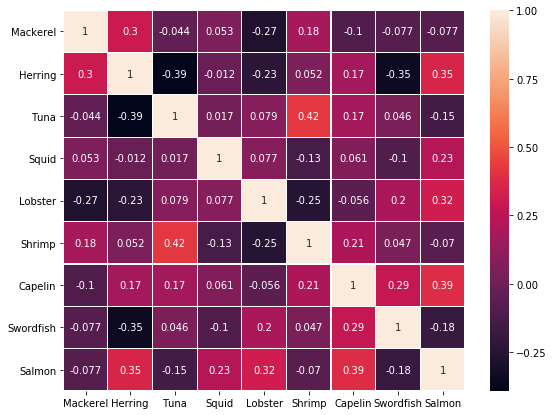

In [548]:
fish_diff = fish_df.diff()
plt.figure(figsize=(9,7))
sns.heatmap(fish_diff.corr(), annot=True , linewidths=.1, );

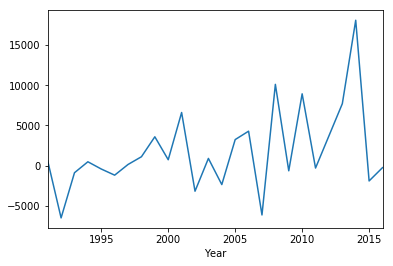

In [540]:
fish_diff[1:]['Lobster'].plot()

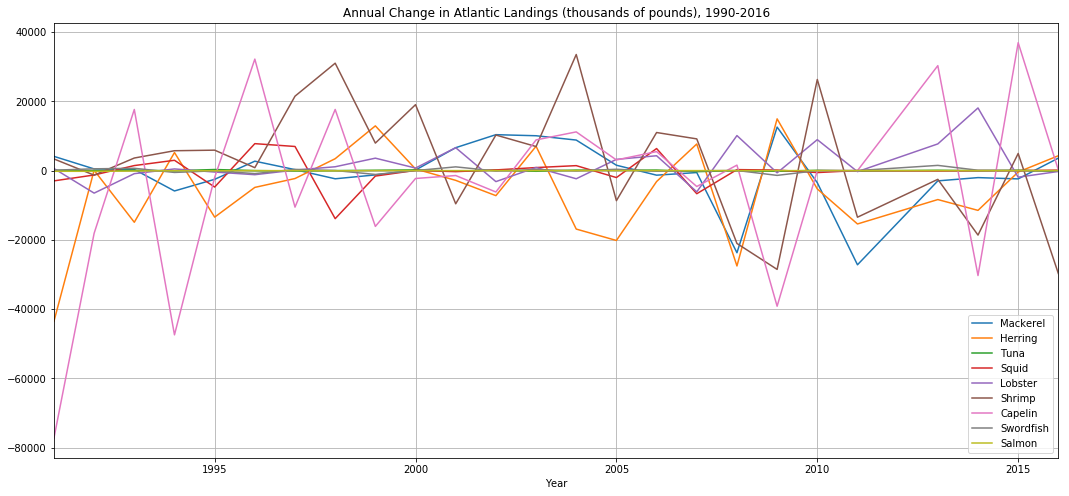

In [536]:
fish_diff[1:].plot(figsize=(18,8), grid=True, title='Annual Change in Atlantic Landings (thousands of pounds), 1990-2016');

In [586]:
data3 = pd.merge(df_list[0], df_list[1], on='merge_code', how='outer')
data3.fillna(0.0, inplace=True)
data3['Species']=data3['Species_vol']
data3['Year'] = data3['Year_y']
data3.drop(['Species_vol','Species_val','Year_y','Species_x', 'Year_x','Species_y', 'merge_code'], axis=1, inplace=True)
#data3 = pd.merge(data3, df_list[2], on='merge_code', how='inner')

In [564]:
print(df_list[0].shape)
print(df_list[1].shape)

(1216, 14)
(1216, 14)


In [612]:
fish_types2 = ['Hake',    'Squid',    'Dogfish',    'Mackerel',    'Shrimp',   'Haddock',   'Smelt',   'Redfish spp.',              'Skate',
                'Swordfish',        'Crab, Other',            'Herring',    'Capelin',    'Total ',   'Tuna',
         'Greenland turbot',            'Pollock',               'Cusk',    'Crab, Queen',            'Catfish',         'Flatfishes',
            'Marine plants',            'Alewife',                'Eel',    'Lobster',         'Sea urchin',       
              'Lumpfish roe',  'Oyster 1/',                'Oyster (1)',    'Scallop (2)',                'Cod',
                  'Halibut',             'Salmon',  'Seafish/Shellfish',    'Clams/quahaug',              'Cockles',
             'Sea cucumber',        'Silversides',  'Salmon (Atlantic)',    'Halibut (Atlantic)',         'Shark',       'Atlantic Cod',
                   'Whelks',    'Clams / quahaug',             'Scallop 2/', 'Mussel (3)', 'Mussel 3/']

In [616]:
data3[ data3['Species'] == 'Salmon'][['Atlantic_total_vol', 'Year']]

,Atlantic_total_vol,Year
36,687.776,1990.0
91,490.023,1991.0
146,281.697,1992.0
201,161.165,1993.0
256,136.211,1994.0
311,102.377,1995.0
366,81.989,1996.0
421,77.487,1997.0
476,6.506,1998.0
531,5.185,1999.0


In [622]:
#data3['Atlantic_total_vol']
fish_list2 = []

for fish in fish_types2:
    tempdf = data3[ data3['Species'] == fish ][['Atlantic_total_vol', 'Year']]
    tempdf.index=tempdf['Year']
    tempdf.drop(['Year'], axis=1, inplace=True)
    tempdf.columns = [fish]
    fish_list2.append(tempdf)
    


In [623]:
fish_df2 = pd.concat(fish_list2, axis=1).fillna(0.0)

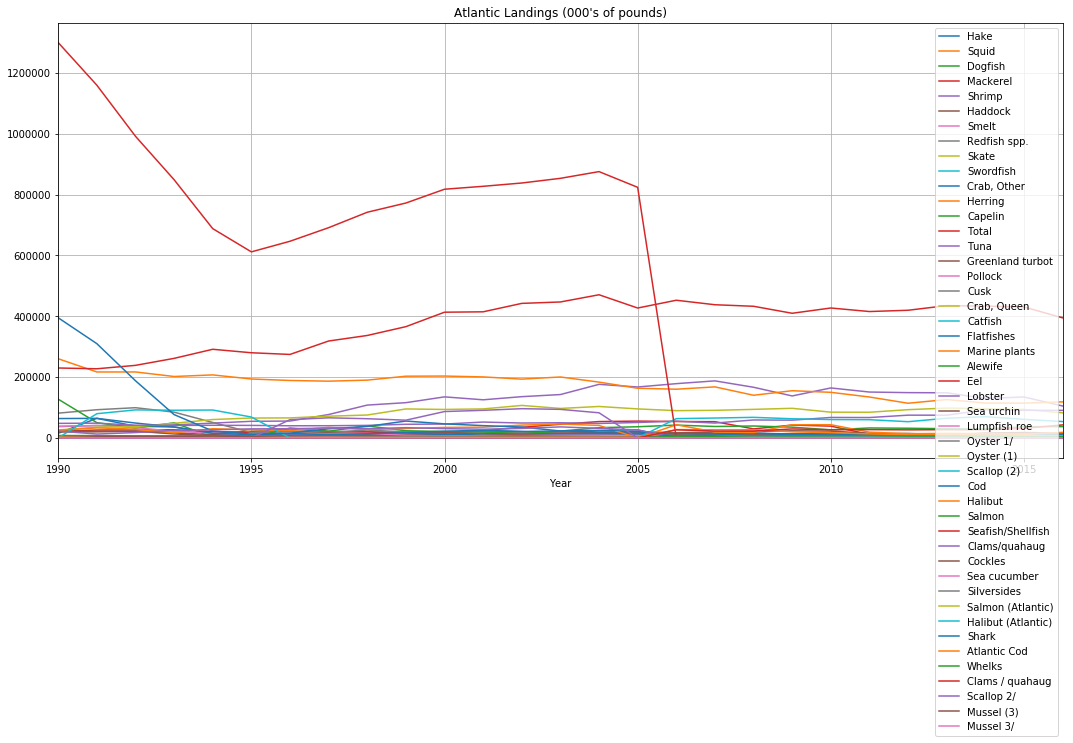

In [626]:
fish_df2[1:].plot(figsize=(18,8), grid=True, title='Atlantic Landings (000\'s of pounds)')

In [ ]:
pivot1 = pd.pivot_table(data3, index= ['Species', 'Year'])
data3

In [633]:
fish_df2.columns

Index(['Hake', 'Squid', 'Dogfish', 'Mackerel', 'Shrimp', 'Haddock', 'Smelt',
       'Redfish spp.', 'Skate', 'Swordfish', 'Crab, Other', 'Herring',
       'Capelin', 'Total ', 'Tuna', 'Greenland turbot', 'Pollock', 'Cusk',
       'Crab, Queen', 'Catfish', 'Flatfishes', 'Marine plants', 'Alewife',
       'Eel', 'Lobster', 'Sea urchin', 'Lumpfish roe', 'Oyster 1/',
       'Oyster (1)', 'Scallop (2)', 'Cod', 'Halibut', 'Salmon',
       'Seafish/Shellfish', 'Clams/quahaug', 'Cockles', 'Sea cucumber',
       'Silversides', 'Salmon (Atlantic)', 'Halibut (Atlantic)', 'Shark',
       'Atlantic Cod', 'Whelks', 'Clams / quahaug', 'Scallop 2/', 'Mussel (3)',
       'Mussel 3/'],
      dtype='object')

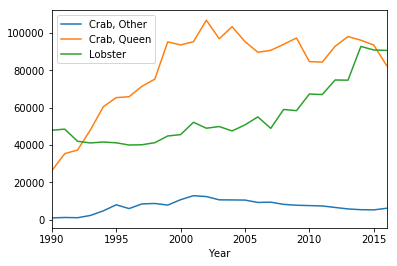

In [635]:
fish_df2 = fish_df2[1:]
fish_df2[['Crab, Other', 'Crab, Queen', 'Lobster']].plot()

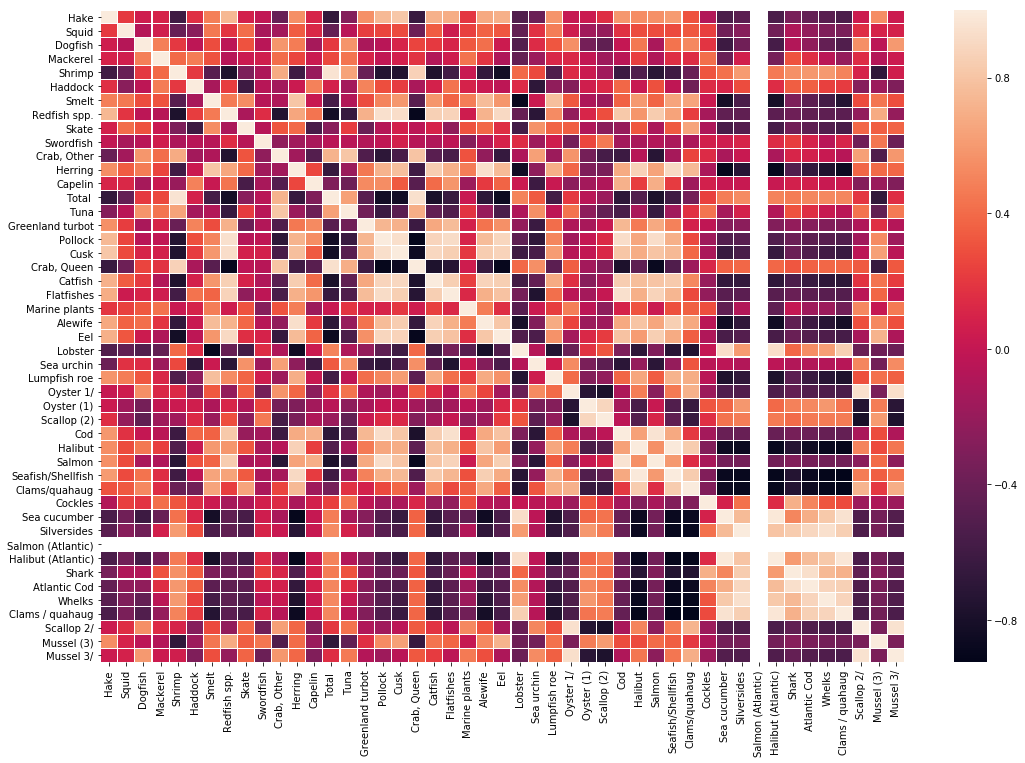

In [642]:
plt.figure(figsize=(18,12))
sns.heatmap(fish_df2.corr(), linewidths=.1, );

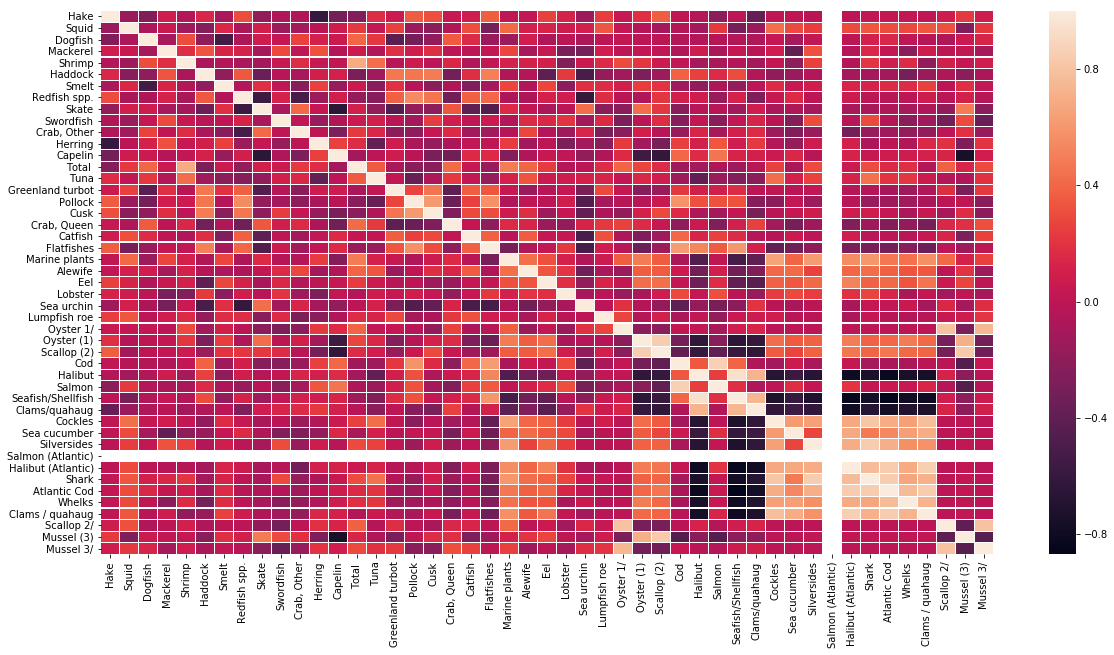

In [645]:
fish_diff2 = fish_df2.diff()
plt.figure(figsize=(20,10))
sns.heatmap(fish_diff2.corr(), linewidths=.1);

In [647]:
fish_df2['Salmon (Atlantic)']

Year
1990.0    0.0
1991.0    0.0
1992.0    0.0
1993.0    0.0
1994.0    0.0
1995.0    0.0
1996.0    0.0
1997.0    0.0
1998.0    0.0
1999.0    0.0
2000.0    0.0
2001.0    0.0
2002.0    0.0
2003.0    0.0
2004.0    0.0
2005.0    0.0
2006.0    0.0
2007.0    0.0
2008.0    0.0
2009.0    0.0
2010.0    0.0
2011.0    0.0
2012.0    0.0
2013.0    0.0
2014.0    0.0
2015.0    0.0
2016.0    0.0
Name: Salmon (Atlantic), dtype: float64

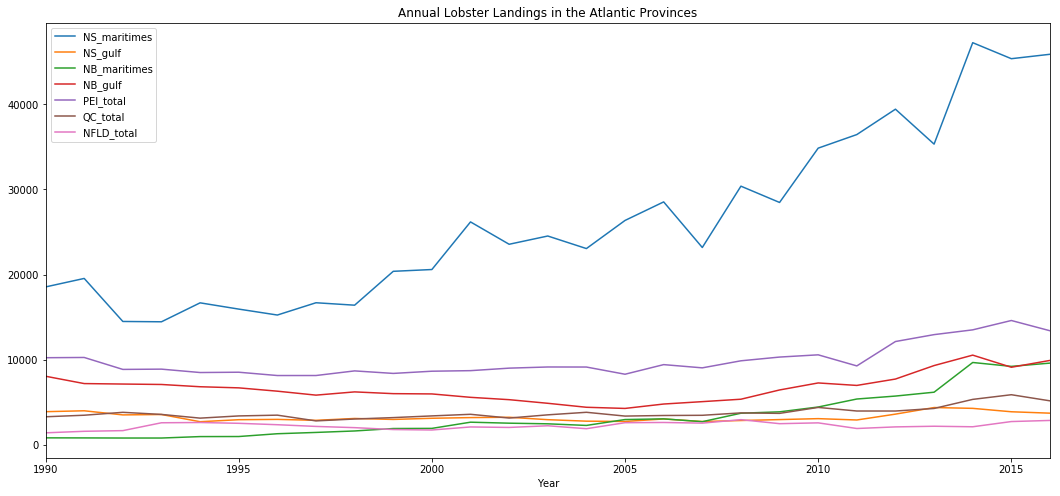

In [366]:
lobster = all_landings[ all_landings['Species']=='Lobster']
lobster.index = lobster['Year']
lobster.drop(['Year', 'Atlantic_total'], axis=1,inplace=True)
lobster.drop(['NS_total', 'NB_total'], axis=1).plot(figsize=(18,8), title='Annual Lobster Landings in the Atlantic Provinces');

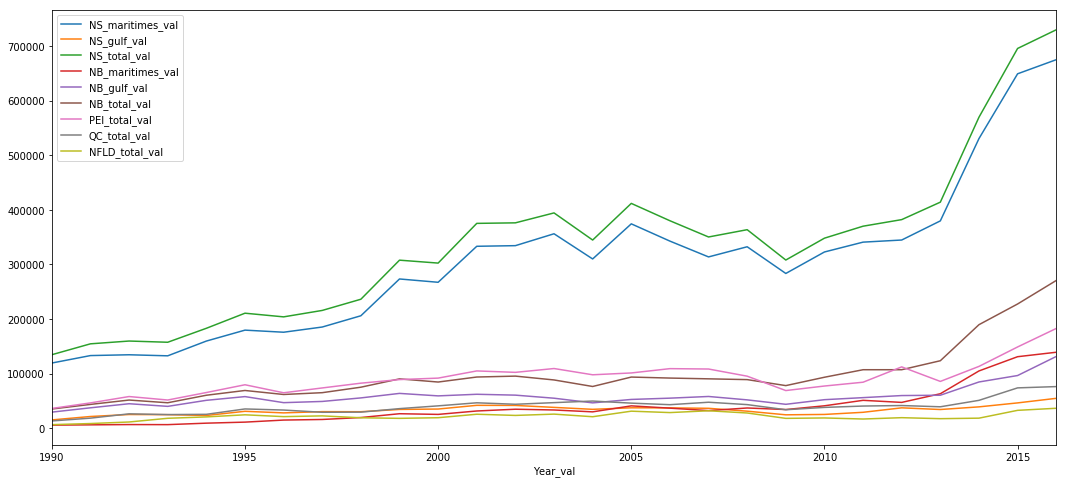

In [181]:
lobster_vals.index = lobster_vals['Year_val']
lobster_vals.drop(['Year_val', 'Atlantic_total_val'], axis=1,inplace=True)
lobster_vals.plot(figsize=(18,8));

In [653]:
data4 = pd.merge(df_list[0], df_list[1], on='merge_code', how='outer')
data4 = pd.merge(data4, df_list[2], on='merge_code', how='outer')
data4.fillna(0.0, inplace=True)
data4['Species']=data4['Species_vol']
data4['Year'] = data4['Year_y']
data4.drop(['Species_vol','Species_val','Year_y','Species_x', 'Year_x','Species_y', 'merge_code'], axis=1, inplace=True)

In [698]:
fish_list3 = []
peiVol = []
peiVal = []
peiLic = []

for fish in fish_types2:
    tempdf = data4[ data4['Species'] == fish ][['PEI_total_vol', 'PEI_total_val', 'PEI_lic', 'Year']]
    tempdf.index=tempdf['Year']
    tempdf.drop(['Year'], axis=1, inplace=True)
    for col in tempdf.columns:
        tempdf2 = pd.DataFrame(tempdf[col])
        tempdf2.columns = [fish]
        
        if col == 'PEI_total_vol':
            peiVol.append(tempdf2)
        elif col == 'PEI_total_val':
            peiVal.append(tempdf2)
        elif col == 'PEI_lic':
            peiLic.append(tempdf2)
            
    fish_list3.append(tempdf)
    
pei_df = pd.concat(fish_list3).fillna(0)
peiVol_df = pd.concat(peiVol, axis=1).fillna(0)
peiVal_df = pd.concat(peiVal, axis=1).fillna(0)
peiLic_df = pd.concat(peiLic, axis=1).fillna(0)

In [716]:
peiLic_df.loc[2012.0]['Lobster'] = 1253
peiLic_df.loc[2012.0]['Herring'] = 868
peiLic_df.loc[2012.0]['Mackerel'] = 1266
peiLic_df.loc[2012.0]['Squid'] = 261
peiLic_df.loc[2012.0]['Swordfish'] = 162
peiLic_df.loc[2012.0]['Herring'] = 868
peiLic_df.loc[2012.0]['Tuna'] = 359

In [719]:
data4['Species'].value_counts()

Total                 252
Other                 243
0.0                   169
Hake                   27
Squid                  27
Dogfish                27
Mackerel               27
Shrimp                 27
Haddock                27
Smelt                  27
Redfish spp.           27
Skate                  27
Swordfish              27
Crab, Other            27
Herring                27
Capelin                27
Total                  27
Tuna                   27
Greenland turbot       27
Pollock                27
Cusk                   27
Crab, Queen            27
Catfish                27
Flatfishes             27
Marine plants          27
Alewife                27
Eel                    27
Lobster                27
Sea urchin             27
Lumpfish roe           27
Mussel (3)             17
Miscellaneous          17
Oyster (1)             17
GRAND TOTAL (4)        17
Scallop (2)            17
Cod                    16
Halibut                16
Salmon                 16
Seafish/Shel

In [673]:
pei_pivot = pd.pivot_table(pei_df,index=pei_df.index,values=["PEI_total_vol", 'PEI_total_val', 'PEI_lic'],
               columns=["Species"],fill_value=0)[1:]

In [706]:
pei_df['price_per_lb'] =  (1000*pei_df['PEI_total_val'])/(pei_df['PEI_total_vol']*2204.62)